# Text detection and recognition on medicine Images

We build this project to detect and recognize text on madicine images

Similarity comparation is made both on text and images



Multi-lauguage will be added

In [11]:
import os
import cv2
import glob
import spacy
import time
import datetime
import data_helpers
import process_image
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import PIL
from PIL import Image
from random import randint
import matplotlib
import matplotlib.pyplot as plt
import pillowfight
import numpy as np
import sys
import pyocr
import pyocr.builders

%matplotlib inline
print('All tools are imported successfully')

All tools are imported successfully


In [12]:
#-Load all images files for detection
ftypes = ('images/*.jpg', 'images/*.png','images/*.bmp', 'images/*.jpeg',
          'images/*.JPG', 'images/*.PNG', 'images/*.BMP', 'images/*.JPEG') 
files_grabbed = []
for files in ftypes:
    files_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(files_grabbed)) + ' images loaded')

There are 5 images loaded


In [13]:
# Next is to prepare Tesseract OCR tools
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print('There are 130 languages available!')
print('We will use following languages:')
print(*langs, sep = '\n')

Will use tool 'Tesseract (sh)'
There are 130 languages available!
We will use following languages:
fra
eng
spa
chi_sim


fra----
— runny nose, sneezing- itchy, watery eyes© sinus pain & pressurere a c qu[ 1804natrabio (30 ml)rp re an t20% usp alcohol
eng----
t al (a r clrlgo c al~ sinus pain & pressureb pr lg[ (n2natrabio (30 ml)natural homeopathic medicine20% usp alcohol
spa----
— runny nose, sa— ltchy, watery eyes— sinus pain % pressureee5) nanatrabio (enatural homeopathic medicineea
chi_sim----
一 runny nose, sn6ezing一 ltchy, watery eyes国 eitsedictuuid言 nasal congestiong 0e[20% usp 2


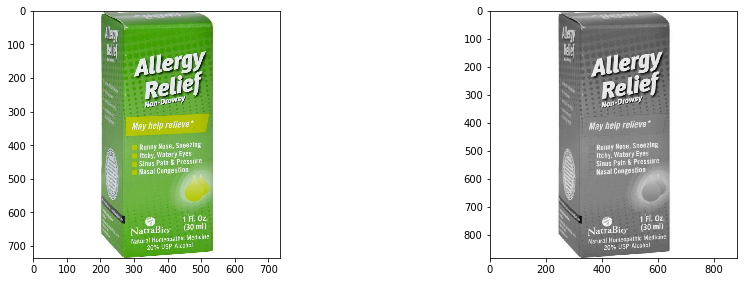

In [14]:
# Get a random image to show
randindex = randint(0, len(files_grabbed)-1)
process_image.improve(files_grabbed[randindex])
list2show = ['ori.jpg','gray.jpg']
plt.figure(figsize=(15,10))
columns = 2
for i, img in enumerate(list2show):
    img = Image.open(img)
    plt.subplot(len(list2show) / columns + 1, columns, i + 1)
    plt.imshow(img,cmap=plt.get_cmap("gray"))    
img = Image.open(files_grabbed[randindex])
result = data_helpers.ext_txt(img, langs, tool)
for lang, txt in result:
    print (lang + '----\n' + txt)

In [18]:
#Following we recognize all images and write to database.
print('Following we recognize all images \n and write all text to database.')
imglist, i = [], 1
dic = {'file': 'f'}
for l in langs:
    dic[l] = '-'
for f in files_grabbed:
    dic['file'] = f
    for l in langs:
        txt = tool.image_to_string(Image.open(f), lang=l, builder=pyocr.builders.TextBuilder())
        clean = data_helpers.process_raw(txt)
        dic[l] = clean
    imglist.append(dic)
    print('file ' + str(i) + ' finished!')
    i += 1
print(len(imglist))
print(imglist[2])

Following we recognize all images 
 and write all text to database.
file 1 finished!
file 2 finished!
file 3 finished!
file 4 finished!
file 5 finished!
5
{'file': 'images/71K28aGrOqL._SL1500_.jpg', 'fra': 'doxylamine succinate, dextromethorphan hbr@ sneezing, runny nosec froiielnighttime cough relief » pioo(', 'eng': 'doxylamine succinate, dextromethorphan hbr@ sneezing, runny nosel at )nighttime cough relief n wa (73', 'spa': '[ r yto e teene tnanamonighttime cough relief en acohol 10%', 'chi_sim': '玟日 sneezing, runny nosemnnighttime cough relief'}


In [46]:
#Following we write all recognize all images and write to database.
print('Following we recognize all images \n and write all text to database.')

with open ('result.txt', 'w', encoding = 'utf-8') as output:
    count = 1
    for f in files_grabbed:
        newimg = process_image.improve(f)
        txt = tool.image_to_string(Image.fromarray(newimg), lang=lang, builder=pyocr.builders.TextBuilder())
        #txt = pyocr.libtesseract.image_to_string(Image.open(f), lang=lang, builder=pyocr.builders.TextBuilder())
        #if len(txt) < 10:
        #    os.remove(f)
        cleantxt = data_helpers.process_raw(txt)
        #head, tail = os.path.split(f)
        #output.write(tail + '\n')
        output.write(cleantxt + '\n')
        time_str = datetime.datetime.now().isoformat()
        if count%5 == 0:
            print("{}: image {} processed, total {:g}".format(time_str, count, len(files_grabbed)))
        #print('image ' + str(count) + '/' + str(len(files_grabbed)) + ' is processed')
        count += 1
        #if len(cleantxt) > 7:
        #    print('Image ' + str(count) + ' is processed:  ' + cleantxt)
        #    count += 1

Following we write all recognize all images 
 and write all text to database.
2018-07-23T15:28:52.758434: image 5 processed, total 81
2018-07-23T15:28:59.913467: image 10 processed, total 81
2018-07-23T15:29:05.793385: image 15 processed, total 81
2018-07-23T15:29:12.981886: image 20 processed, total 81
2018-07-23T15:29:17.020611: image 25 processed, total 81
2018-07-23T15:29:28.064320: image 30 processed, total 81
2018-07-23T15:29:34.663710: image 35 processed, total 81
2018-07-23T15:29:40.639186: image 40 processed, total 81
2018-07-23T15:29:44.833974: image 45 processed, total 81
2018-07-23T15:29:48.516643: image 50 processed, total 81
2018-07-23T15:29:53.635648: image 55 processed, total 81
2018-07-23T15:29:59.017280: image 60 processed, total 81
2018-07-23T15:30:04.781511: image 65 processed, total 81
2018-07-23T15:30:09.577326: image 70 processed, total 81
2018-07-23T15:30:14.605611: image 75 processed, total 81
2018-07-23T15:30:22.710669: image 80 processed, total 81


There are 5 images loaded


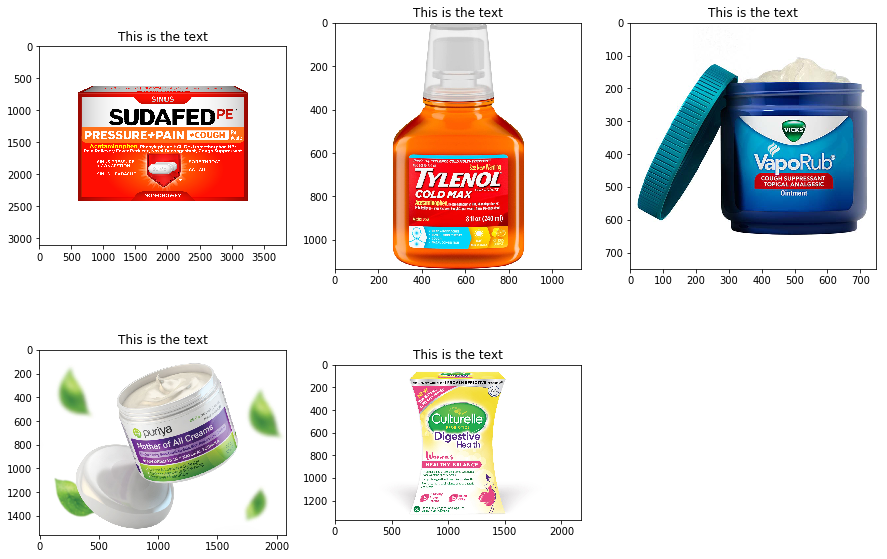

In [75]:
#-Load all images for test
testypes = ('testimg/*.jpg', 'testimg/*.png','testimg/*.bmp', 'testimg/*.jpeg',
          'testimg/*.JPG', 'testimg/*.PNG', 'testimg/*.BMP', 'testimg/*.JPEG') 
test_grabbed = []
for files in testypes:
    test_grabbed.extend(glob.glob(files))

print ('There are ' + str(len(test_grabbed)) + ' images loaded')
plt.figure(figsize=(15,10))
columns = 3
for i, img in enumerate(test_grabbed):
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(len(test_grabbed) / columns + 1, columns, i + 1)
    plt.imshow(img)  
    plt.title('This is the text')    

In [ ]:
gray_test = process_image.improve('3.jpg')
gray_test = cv2.cvtColor(gray_test, cv2.COLOR_GRAY2RGB)
plt.imshow(gray_test)

In [ ]:
test_txt = tool.image_to_string(Image.fromarray(gray_test), lang=lang, builder=pyocr.builders.TextBuilder())
print('------Following is raw text------')
print(test_txt)

print('------Following is cleaned text------')
clean_test = data_helpers.process_raw(test_txt)
print(clean_test)

In [14]:
with open('result.txt', 'r') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content]
print(len(content))
print(content[5])

99
ndc 0220-9325-04su hoarsenessred, dry and sore throat’throatcalmhomeopathic medicine  = non-drowsy@ no known drug interactions@ melts under your tongue  cpv aequick-dissolvingbo .@ n° tabletsmoya cs ete th) neen ec len ects


31
33
21
24
24
20
27
20
34
31
18
28
30
36
25
24
39
26
46
41
25
0
28
25
35
0
30
37
0
0
29
24
27
0
41
23
20
28
36
32
23
41
38
29
26
0
9
37
24
42
29
0
35
35
0
0
39
26
19
20
18
17
36
29
28
23
41
20
72
17
23
36
14
23
36
0
26
34
0
31
0
42
35
20
35
0
0
28
0
35
26
31
26
0
25
30
67
43
36


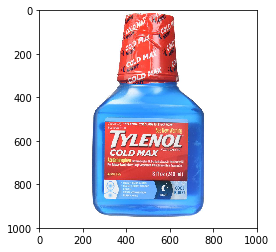

In [15]:
# get the maximum similar image
max_ratio, target = 0, 0
for index, val in enumerate(content):
    ratio = fuzz.partial_ratio(val, clean_test)
    if ratio > max_ratio:
        max_ratio = ratio
        target = index 
    print(str(ratio))
    
target_img = cv2.imread(files_grabbed[target])
target_img = cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB)
plt.imshow(target_img)